#   치매란?
*   특정 질병이 아닌 정상적으로 생활해오던 사람이 다양한 원인으로 인해 뇌기능이 손상되어 기역력, 사고력, 판단력 등이 일상행활에 지장을 줄 정도로 감소하는 증상을 통칭하는 용어
*   시간이 흐를수록 증상이 점진적으로 악화되는 경향이 있음.
*   알츠하이머병이 치매의 가장 흔한 유형이며, 전체 치매의 약 60-80%를 차지함
*   그 외로는 혈관성 치매, 루이소체 치매, 전측두엽 치매 등이 있음
*   하나만의 원인이 아닌 여러 유형의 치매가 동시에 존재할 수 있음
*   과거에는 노화로 인해 발생하는 질환으로 여겨져왔으나 최근은 유전, 습관, 생활 방식 등 여러 원인이 복합적으로 작용한다고 알려짐
*   진단은 주로 문진 또는 인지 기능 검사로 진행하며, 신체검사/혈액검사(갑상선, 비타민, 전해질 등 이상 확인), 신경영상 검사(CT, MRI 등)를 통하여 진단함
*   증상 완화 약물(콜린성 약물, NMDA 수용체 조절 약물 등)이 존재하며, 초기 및 중기 치매를 완화 시킬수 있음
*   치매의 약 45%는 생활습관 개선 등으로 예방하거나 발병을 지연시킬 수 있음
*   초기 증상으로 기역력 저하, 건방증 등
*   중기 증상으로 언어 구사 문제, 시간/공간 감각 혼란, 판단력 저하, 일상생활 수행 곤란 등
*   말기 증상으로 신체 기능 유지가 어려워져 돌봄이 필요해짐
*   예방은 식습관 개선, 혈압, 혈당, 콜레스테롤 조절, 금주, 금연 등 일상생활 개선이 필요하며
*   신체 활동, 인지 자극 활동, 사회적 활동 등 뇌기능 자극을 통하여 예방 또는 발병지연이 가능하다.

### 참고문헌

1.   [Centers for Disease Control and Prevention(CDC, 미국 질병통제예방센터): Alzheimer's Disease and Dementia](https://www.cdc.gov/alzheimers-dementia/about/)
2.   [서울대학교병원 의학정보: 치매](https://terms.naver.com/entry.naver?docId=927317&cid=51007&categoryId=51007)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 같은 이름의 3개의 파일이 같은 파일인지 확인

In [244]:
# tr_lab_df1 = pd.read_csv(r"1.Training\라벨링데이터\1.걸음걸이\training_label.csv")
# tr_lab_df2 = pd.read_csv(r"1.Training\라벨링데이터\2.수면\training_label.csv")
# tr_lab_df3 = pd.read_csv(r"1.Training\라벨링데이터\3.인지기능\training_label.csv")

In [245]:
# all_equal = tr_lab_df1.equals(tr_lab_df2) and tr_lab_df2.equals(tr_lab_df3)
# print(all_equal)  

### 데이터 확인

In [246]:
tr_lab_df = pd.read_csv(r"01.데이터\1.Training\라벨링데이터\1.걸음걸이\training_label.csv")

### SAMPLE_EMAIL
*   각 환자들의 이메일, ID로 사용될 수 있음

### DIAG_NM
*   각 환자들의 상태를 라벨링 한 데이터로 확인됨
*   CN(Cognitively Normal): 정상 인지 상태
*   MCI(Mild Cognitive Impairment): 경도 인지 장애
*   Dem(Dementia): 치매

##### 참고문헌
*   [Dementia and Cognitive Impairment: Epidemiology, Diagnosis, and Treatment](https://pmc.ncbi.nlm.nih.gov/articles/PMC4104432/)

In [247]:
tr_lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SAMPLE_EMAIL  141 non-null    object
 1   DIAG_NM       141 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [248]:
tr_lab_df['DIAG_NM'].unique()

array(['CN', 'MCI', 'Dem'], dtype=object)

In [249]:
tr_act_df = pd.read_csv(r"01.데이터\1.Training\원천데이터\1.걸음걸이\train_activity.csv")
tr_sle_df = pd.read_csv(r"01.데이터\1.Training\원천데이터\2.수면\train_sleep.csv")
tr_mmse_df = pd.read_csv(r"01.데이터\1.Training\원천데이터\3.인지기능\train_mmse.csv")

##  train_actovoty
*   각 환자들의 일별 활동 정보를 
*   141명의 actovoty정보가 들어있음
*   결측치, 중복은 없음
*   activity_day_end, activity_day_start: 시계열 데이터, 활동 시작 및 종료 시간 
*   activity_class_5min, activity_met_1min: ...으로 비어있는 데이터 데이터베이스에서 BLOB타입 데이터를 꺼내면서 소실된 것으로 확인
*   CONVERT(activity_class_5min USING utf8), CONVERT(activity_met_1min USING utf8): 소실된 BLOB타입 데이터를 UTF8으로 컨버팅하여 꺼낸 데이터로 확인
*   activity_class_5min: 하루 5분 당 활동 수준의 로그로 5분단위로 상태를 1, 2, 3, 4로 저장
*   activity_met_1min: 하루 1분당 MET로그
*   MET란 Metabolic Equivalent of Task[by CDC](https://www.cdc.gov/physical-activity-basics/measuring/index.html?utm_source=chatgpt.com)의 약자로 신체 활동의 강도를 나타내는 단위
*   안정시의 에너지 소모량을 1로 1MET는 3.5ml O₂/kg/min 정도 된다
*   1MET는 가만히 앉아있는 소모데는 에너지 또는 산소량
*   3~5.9MET는 중강도 신체활동
*   6MET 이상은 고강도 신체활동을 뜻한다. 
*   CONVERT된 데이터는 vecter로 변환
*   주간 운동 총량을 채운다면 몰아서 하든 나누어 하든 얻는 건강상 이점의 차이점이 없는것으로 보임[doi:10.1001/jamainternmed.2022.2488](https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2794038?)

In [250]:
tr_act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EMAIL                                    9705 non-null   object 
 1   activity_average_met                     9705 non-null   float64
 2   activity_cal_active                      9705 non-null   int64  
 3   activity_cal_total                       9705 non-null   int64  
 4   activity_class_5min                      9705 non-null   object 
 5   activity_daily_movement                  9705 non-null   int64  
 6   activity_day_end                         9705 non-null   object 
 7   activity_day_start                       9705 non-null   object 
 8   activity_high                            9705 non-null   int64  
 9   activity_inactive                        9705 non-null   int64  
 10  activity_inactivity_alerts               9705 no

In [251]:
len(tr_act_df['EMAIL'].unique())

141

In [252]:
tr_act_df.head()

EMAIL  activity_average_met  activity_cal_active  \
0  nia+279@rowan.kr               1.28125                  196   
1  nia+279@rowan.kr               1.25000                  145   
2  nia+279@rowan.kr               1.21875                  118   
3  nia+279@rowan.kr               1.28125                  180   
4  nia+279@rowan.kr               1.46875                  374   

   activity_cal_total activity_class_5min  activity_daily_movement  \
0                2251                 ...                     3353   
1                2159                 ...                     2516   
2                2140                 ...                     1716   
3                2240                 ...                     2791   
4                2559                 ...                     5393   

            activity_day_end         activity_day_start  activity_high  \
0  2020-10-20T03:59:59+09:00  2020-10-19T04:00:00+09:00              0   
1  2020-10-21T03:59:59+09:00  2020-10-20T04:00:00+09:00              0   
2  2020-10-22T03:59:59+09:00  2020-10-21T04:00:00+09:00              0   
3  2020-10-23T03:59:59+09:00  2020-10-22T04:00:00+09:00              0   
4  2020-10-24T03:59:59+09:00  2020-10-23T04:00:00+09:00              0   

   activity_inactive  ...  activity_score_meet_daily_targets  \
0                714  ...                                 78   
1                719  ...                                 60   
2                708  ...                                 43   
3                705  ...                                 43   
4                437  ...                                 43   

   activity_score_move_every_hour  activity_score_recovery_time  \
0                             100                           100   
1                             100                           100   
2                              95                           100   
3                             100                           100   
4                             100                           100   

  activity_score_stay_active  activity_score_training_frequency  \
0                         54                                100   
1                         58                                 96   
2                         55                                 71   
3                         58                                 71   
4                         89                                 40   

   activity_score_training_volume  activity_steps  activity_total  \
0                              97            4212             207   
1                              96            3306             140   
2                              83            2550             131   
3                              59            4009             208   
4                              46            8081             517   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            CONVERT(activity_class_5min USING utf8)  \
0  1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/3/3/3/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/2/2/2/2/2/1/1/2/2/2/2/2/2/3/4/2/2/2/2/2/3/4/4/2/2/3/2/2/2/2/2/2/2/2/1/1/2/2/2/3/4/4/3/3/2/3/4/3/3/2/2/2/2/3/2/3/2/2/1/1/1/2/2/2/2/2/2/2/2/2/3/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/3/2/2/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/3/3/3/3/2/2/2/3/3/3/3/2/2/2/2/2/2/2/2/2/2/1/2/1/1/1/2/2/2/2/2/2/2/2/2/2/1/1/1/2/2/2/2/2/3/2/3/2/2/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/2/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1

In [253]:
tr_act_df.duplicated().sum()

np.int64(0)

In [254]:
tr_act_df.columns

Index(['EMAIL', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_class_5min', 'activity_daily_movement',
       'activity_day_end', 'activity_day_start', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_1min', 'activity_met_min_high',
       'activity_met_min_inactive', 'activity_met_min_low',
       'activity_met_min_medium', 'activity_non_wear', 'activity_rest',
       'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)'],
      dtype='object')

In [255]:
obj_list = ['activity_class_5min', 'activity_day_end', 'activity_day_start', 'activity_met_1min', 'CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)']
tr_act_df[obj_list[:3]]

,activity_class_5min,activity_day_end,activity_day_start
0,...,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00
1,...,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00
2,...,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00
3,...,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00
4,...,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00
...,...,...,...
9700,...,2020-12-25T03:59:59+09:00,2020-12-24T04:00:00+09:00
9701,...,2020-12-27T03:59:59+09:00,2020-12-26T04:00:00+09:00
9702,...,2020-12-28T03:59:59+09:00,2020-12-27T04:00:00+09:00
9703,...,2020-12-29T03:59:59+09:00,2020-12-28T04:00:00+09:00


In [256]:
print(tr_act_df['activity_day_end'].unique())
print(len(tr_act_df['activity_day_end'].unique()))

['2020-10-20T03:59:59+09:00' '2020-10-21T03:59:59+09:00'
 '2020-10-22T03:59:59+09:00' '2020-10-23T03:59:59+09:00'
 '2020-10-24T03:59:59+09:00' '2020-10-25T03:59:59+09:00'
 '2020-10-26T03:59:59+09:00' '2020-10-27T03:59:59+09:00'
 '2020-10-28T03:59:59+09:00' '2020-10-29T03:59:59+09:00'
 '2020-10-30T03:59:59+09:00' '2020-10-31T03:59:59+09:00'
 '2020-11-01T03:59:59+09:00' '2020-11-02T03:59:59+09:00'
 '2020-11-03T03:59:59+09:00' '2020-11-04T03:59:59+09:00'
 '2020-11-05T03:59:59+09:00' '2020-11-06T03:59:59+09:00'
 '2020-11-07T03:59:59+09:00' '2020-11-08T03:59:59+09:00'
 '2020-11-09T03:59:59+09:00' '2020-11-10T03:59:59+09:00'
 '2020-11-11T03:59:59+09:00' '2020-11-12T03:59:59+09:00'
 '2020-11-13T03:59:59+09:00' '2020-11-14T03:59:59+09:00'
 '2020-11-16T03:59:59+09:00' '2020-11-17T03:59:59+09:00'
 '2020-11-18T03:59:59+09:00' '2020-11-19T03:59:59+09:00'
 '2020-11-20T03:59:59+09:00' '2020-11-21T03:59:59+09:00'
 '2020-11-22T03:59:59+09:00' '2020-11-23T03:59:59+09:00'
 '2020-11-24T03:59:59+09:00' '2

In [257]:
tr_act_df[obj_list[3:]]

activity_met_1min  \
0                  ...   
1                  ...   
2                  ...   
3                  ...   
4                  ...   
...                ...   
9700               ...   
9701               ...   
9702               ...   
9703               ...   
9704               ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               CONVERT(activity_class_5min USING utf8)  \
0     1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/3/3/3/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/2/2/2/2/2/1/1/2/2/2/2/2/2/3/4/2/2/2/2/2/3/4/4/2/2/3/2/2/2/2/2/2/2/2/1/1/2/2/2/3/4/4/3/3/2/3/4/3/3/2/2/2/2/3/2/3/2/2/1/1/1/2/2/2/2/2/2/2/2/2/3/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/3/2/2/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/3/3/3/3/2/2/2/3/3/3/3/2/2/2/2/2/2/2/2/2/2/1/2/1/1/1/2/2/2/2/2/2/2/2/2/2/1/1/1/2/2/2/2/2/3/2/3/2/2/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/2/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/   
1     1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/2/3/2/2/2/2/3/2/2/2/2/2/2/1/2/1/1/1/2/2/2/3/1/2/2/2/1/2/3/2/2/3/3/2/2/2/2/2/2/1/1/1/1/2/2/1/1/2/2/3/3/4/3/3/3/2/3/2/2/3/3/3/2/2/2/2/3/2/2/2/2/2/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/2/1/1/2/2/2/2/2/2/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/4/4/4/2/1/2/2/2/2/2/2/2/2/3/3/3/2/3/3/3/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/1/2/2/2/2/2/2/2/2/2/2/2/2/2/3/2/2/2/1/1/1/1/2/1/1/2/1/1/1/2/2/1/1/2/2/2/2/3/2/2/2/2/2/2/2/2/1/1/1/1/1/2/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/1/1/1/1/1/   
2     1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/3/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/1/2/2/2/2/1/2/2/1/2/1/1/1/1/1/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/2/3/4/4/3/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/1/1/1/1/1/1/2/2/2/2/2/2/2/2/2/2/2/3/3/2/2/2/2/3/2/3/3/2/2/2/2/2/1/2/2/1/1/1/1/1/1/2/2/2/2/2/2/3/2/3/3/3/2/3/2/3/2/2/2/2/3/3/2/2/2/2/2/2/2/2/3/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/1/1/1/2/2/2/1/1/2/2/2/2/2/1/2/2/2/2/2/2/2/2/2/2/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/   
3     1/1/1/1/1/1/1/1/1/1/2/2/2/2/3/3/3/2/3/3/3/3/3/2/3/2/3/3/3/2/2/3/2/3/3/3/2/2/2/2/2/2/2/3/2/2/2/2/2/2/2/2/2/3/2/3/3/3/4/3/3/4/3/3/3/3/3/3/2/2/2/2/2/3/4/3/4/4/3/3/3/2/3/2/2/2/2/2/2/1/2/2/2/2/2/3/3/2/3/2/2/2/2/2/2/2/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/3/2/2/2/2/2/2/2/1/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/2/2/2/1/1/1/2/2/3/2/2/2/2/2/2/2/2/3/3/3/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/2/2/2/2/2/2/2/2/2/1/1/1/1/1/1/1/3/3/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/2/2/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/2/2/2/2/2/1/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/1/1/1/1/1/1/1/   
4     1/1/1/2/2/2/2/2/2/1/1/1/3/2/2/1/2/2/2/3/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/3/3/3/3/3/3/3/3/2/3/3/3/3/3/3/3/2/3/3/3/3/2/3/3/3/2/1/0/0/0/0/0/0/3/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/2/2/3/3/3/2/3/2/3/3/3/2/3/2/3/2/2/3/2/3/2/3/2/3/2/2/4/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/2/3/3/3/3/3/3/2/3/3/3/3/3/3/3/3/2/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/2/3/3/3/2/2/2/2/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/3/2/2/3/3/2/2/2/3/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/   
...                                                                                                                                                                             

In [258]:
tr_act_df[['activity_class_5min', 'activity_met_1min']]

,activity_class_5min,activity_met_1min
0,...,...
1,...,...
2,...,...
3,...,...
4,...,...
...,...,...
9700,...,...
9701,...,...
9702,...,...
9703,...,...


In [259]:
print(tr_act_df['activity_class_5min'].unique(), tr_act_df['activity_met_1min'].unique())

['...'] ['...']


In [260]:
tr_act_df['CONVERT(activity_class_5min USING utf8)'][0]

'1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/3/3/3/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/2/2/2/2/2/1/1/2/2/2/2/2/2/3/4/2/2/2/2/2/3/4/4/2/2/3/2/2/2/2/2/2/2/2/1/1/2/2/2/3/4/4/3/3/2/3/4/3/3/2/2/2/2/3/2/3/2/2/1/1/1/2/2/2/2/2/2/2/2/2/3/2/2/2/2/2/2/2/2/2/2/2/1/1/2/2/2/2/3/2/2/3/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/2/2/2/2/2/2/3/4/3/3/3/3/3/2/2/2/3/3/3/3/2/2/2/2/2/2/2/2/2/2/1/2/1/1/1/2/2/2/2/2/2/2/2/2/2/1/1/1/2/2/2/2/2/3/2/3/2/2/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/2/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/1/1/1/1/'

In [261]:
def convert_int(df):
    df = str(df).strip('/')
    return [int(v) for v in df.split('/') if v]

def convert_flo(df):
    df = str(df).strip('/')
    return [float(v) for v in df.split('/') if v]

In [262]:
tr_act_df['activity_class_5min_list'] = tr_act_df['CONVERT(activity_class_5min USING utf8)'].apply(convert_int)
tr_act_df['activity_met_1min_list'] = tr_act_df['CONVERT(activity_met_1min USING utf8)'].apply(convert_flo)


In [263]:
tr_act_df[['activity_class_5min_list','activity_met_1min_list']].head(1)

,activity_class_5min_list,activity_met_1min_list
0,"[1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 4, 4, 3, 3, 2, 3, 4, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, ...]","[1.2, 0.9, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.2, 0.9, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.1, 1.2, 1.1, 1.2, 1.3, 1.2, 1.2, 1.2, 1.1, 0.9, 0.9, 0.9, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.2, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.3, 1.3, 1.4, 1.3, 1.4, 1.2, 1.4, 1.4, 1.2, 1.3, 1.3, 1.2, 1.2, 1.2, 1.1, 1.2, 1.3, 1.3, 1.2, 1.2, 1.3, 1.2, 1.2, 1.1, 1.5, 1.3, 1.4, 1.4, 1.3, 1.3, 1.2, 1.6, ...]"


In [264]:
len(tr_act_df['activity_class_5min_list'][0])

288

In [265]:
set(tr_act_df['activity_class_5min_list'][0])

{1, 2, 3, 4}

In [266]:
len(tr_act_df['activity_met_1min_list'][0])

1440

In [267]:
set(tr_act_df['activity_met_1min_list'][0])

{0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.4,
 4.7,
 4.8,
 5.1,
 5.3}

In [268]:
tr_act_df['activity_day_end'] = pd.to_datetime(tr_act_df['activity_day_end'], errors='coerce')

tr_act_df['end_year'] = tr_act_df['activity_day_end'].dt.year
tr_act_df['end_month'] = tr_act_df['activity_day_end'].dt.month
tr_act_df['end_day'] = tr_act_df['activity_day_end'].dt.day
tr_act_df['end_hour'] = tr_act_df['activity_day_end'].dt.hour

tr_act_df['activity_day_start'] = pd.to_datetime(tr_act_df['activity_day_start'], errors='coerce')

tr_act_df['sta_year'] = tr_act_df['activity_day_start'].dt.year
tr_act_df['sta_month'] = tr_act_df['activity_day_start'].dt.month
tr_act_df['sta_day'] = tr_act_df['activity_day_start'].dt.day
tr_act_df['sta_hour'] = tr_act_df['activity_day_start'].dt.hour

In [269]:
tr_act_df[['end_year','end_month','end_day','end_hour','sta_year','sta_month','sta_day','sta_hour']].head()

,end_year,end_month,end_day,end_hour,sta_year,sta_month,sta_day,sta_hour
0,2020,10,20,3,2020,10,19,4
1,2020,10,21,3,2020,10,20,4
2,2020,10,22,3,2020,10,21,4
3,2020,10,23,3,2020,10,22,4
4,2020,10,24,3,2020,10,23,4


In [270]:
tr_act_df.columns

Index(['EMAIL', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_class_5min', 'activity_daily_movement',
       'activity_day_end', 'activity_day_start', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_1min', 'activity_met_min_high',
       'activity_met_min_inactive', 'activity_met_min_low',
       'activity_met_min_medium', 'activity_non_wear', 'activity_rest',
       'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)', 'activity_class_5min_list',
       'activity_met_1min_list', 'end_year', 'end_month', 'end_day',
       'end_hour', 'sta_year', 's

In [271]:

diff_df = tr_act_df[[tr_act_df for tr_act_df in tr_act_df.columns[:-10] if tr_act_df not in obj_list]]
diff_df.columns

Index(['EMAIL', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_daily_movement', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total'],
      dtype='object')

In [272]:
def upseampl(df_list):
    return np.repeat(df_list, 5)[:1440]

def BLOB_to_vecter(df, col_heart, col_MET):
    heart = np.array(df[col_heart], dtype='int')
    met = np.array(df[col_MET], dtype='float')

    #if len(met) == len(heart) * 5:
    #    heart = upseampl(heart)
    #elif len(met) != len(heart) * 5:
    #    heart = upseampl(heart)[:len(met)]

    return heart, met

In [273]:
heart_vec, met_vec = [], []

for _, row in tr_act_df.iterrows():
    heart, met = BLOB_to_vecter(row, 'activity_class_5min_list','activity_met_1min_list')
    heart_vec.append(heart)
    met_vec.append(met)

tr_act_df['heart_vecter'] = heart_vec
tr_act_df['met_vecter'] = met_vec

In [274]:
train_activity_v1 = tr_act_df.drop(['activity_met_1min','activity_class_5min','CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)'], axis=1)

In [275]:
train_activity_v1.to_csv(r"01.데이터\1.Training\원천데이터\1.걸음걸이\train_activity_v1.csv")

## train_sleep
*   각 환자들의 일별 수면 정보가 들어가 있음
*   결측, 중복은 없음
*   컬럼 중복은 존재
*   수면은 들쭉날쭉한 수면 패턴을 가지는것 보다 일정한 패턴을 가지는 경우가 건강한 것으로 확인됨 [doi: 10.1007/s41105-023-00460-6](https://pmc.ncbi.nlm.nih.gov/articles/PMC10900010/)
*   하지만 어느정도의 보상수면은 건강에 이득을 주는것으로 확인[DOI: 10.1093/sleep/zsad253](https://pubmed.ncbi.nlm.nih.gov/37738616/)

In [276]:
tr_sle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9705 non-null   object 
 1   sleep_awake                               9705 non-null   int64  
 2   sleep_bedtime_end                         9705 non-null   object 
 3   sleep_bedtime_start                       9705 non-null   object 
 4   sleep_breath_average                      9705 non-null   float64
 5   sleep_deep                                9705 non-null   int64  
 6   sleep_duration                            9705 non-null   int64  
 7   sleep_efficiency                          9705 non-null   int64  
 8   sleep_hr_5min                             9705 non-null   object 
 9   sleep_hr_average                          9705 non-null   float64
 10  sleep_hr_lowest                     

In [277]:
len(tr_sle_df['EMAIL'].unique())

141

In [278]:
tr_sle_df.head()

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+279@rowan.kr,8700,2020-10-19T05:10:28+09:00,2020-10-18T18:38:28+09:00,17.875,10110,37920,77,...,53.04,...,65,89,56,94,0.00,0.00,29220,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/0/0/0/53/53/53/52/52/51/53/52/52/51/53/52/53/53/53/54/54/53/54/54/54/54/54/54/52/52/52/52/53/53/56/54/54/57/55/56/56/57/57/57/57/56/58/54/55/54/53/52/53/52/51/51/50/50/51/51/51/51/51/51/52/52/51/53/52/51/51/50/50/0/0/0/0/0/0/0/0/50/51/51/51/53/53/53/50/51/51/50/50/52/50/50/53/50/50/49/0/50/51/51/51/55/52/0/0/53/53/0/,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/1/1/1/1/1/1/1/1/1/1/3/1/1/1/1/1/1/1/1/2/2/2/1/1/1/1/1/2/2/3/3/2/1/1/1/1/1/1/1/4/4/2/4/2/2/3/2/2/2/2/2/2/2/2/2/2/2/3/3/2/2/2/2/2/2/4/4/4/4/4/4/4/4/4/2/2/2/3/2/2/3/2/2/2/2/2/2/2/4/3/3/3/4/4/4/4/2/2/3/3/4/4/4/4/,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/0/0/0/40/38/42/29/25/28/33/36/37/31/45/31/35/33/34/32/41/38/33/37/31/30/26/39/42/40/42/43/47/40/37/37/34/36/44/39/30/31/33/34/30/35/29/33/35/36/38/34/48/37/41/43/75/41/36/35/40/40/43/41/44/38/51/41/45/42/41/43/49/0/0/0/0/0/0/0/0/56/41/49/39/45/71/36/57/39/40/44/50/45/44/43/46/50/48/50/0/42/50/73/36/35/38/0/0/42/39/0/
1,nia+279@rowan.kr,6570,2020-10-20T05:37:52+09:00,2020-10-19T21:39:52+09:00,18.000,7440,28680,77,...,52.82,...,65,97,43,65,0.34,0.34,22110,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/53/53/54/55/55/56/56/54/53/53/53/53/53/52/53/54/56/53/52/52/54/53/55/54/54/54/55/55/54/52/52/53/51/50/51/51/51/50/50/50/51/52/53/52/56/53/54/55/54/53/53/54/53/55/56/58/56/55/55/54/53/50/50/52/52/0/0/0/0/0/0/52/49/50/50/50/50/51/50/0/,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/2/2/1/1/1/1/2/2/1/2/2/2/1/2/2/2/1/1/1/1/1/4/2/2/4/4/2/2/4/2/2/2/1/1/1/1/2/1/1/2/2/2/2/2/2/2/1/1/4/4/2/2/2/2/3/3/4/4/4/4/4/4/4/4/4/2/2/2/2/3/4/4/4/,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/31/31/32/26/29/33/32/29/34/32/32/34/40/36/35/38/37/40/41/47/45/45/41/38/41/41/41/50/40/41/40/35/37/39/44/59/54/50/48/41/51/52/47/52/37/54/49/39/32/33/33/35/34/32/33/38/34/45/31/28/37/48/50/38/35/0/0/0/0/0/0/47/59/50/44/55/79/90/72/0/
2,nia+279@rowan.kr,10530,2020-10-21T05:45:28+09:00,2020-10-20T20:51:28+09:00,18.000,4620,32040,67,...,52.01,...,41,75,68,62,-0.07,-0.07,21510,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55/57/0/0/0/0/0/0/0/0/0/0/0/53/53/54/53/54/54/54/52/52/52/52/52/52/53/53/53/51/51/53/53/51/52/54/53/52/50/50/53/52/52/55/53/53/55/55/52/53/52/52/52/53/53/53/53/53/54/54/57/53/51/49/47/47/49/49/50/51/50/50/51/51/50/51/49/49/49/47/48/48/48/48/48/49/50/47/49/0/0/,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/4/4/4/4/4/4/4/2/4/4/2/2/4/4/2/2/2/2/2/1/1/1/2/2/2/2/2/2/2/1/1/4/4/4/4/3/2/1/1/1/1/2/2/2/2/1/1/1/1/2/2/2/2/4/4/4/4/3/3/3/2/2/2/2/2/2/2/2/3/2/2/3/3/3/3/3/3/3/3/2/3/3/4/4/,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53/52/0/0/0/0/0/0/0/0/0/0/0/39/48/49/46/73/46/41/43/37/40/36/36/36/40/39/41/42/56/50/37/47/41/32/37/43/56/44/39/43/40/37/35/35/40/38/35/42/40/45/51/44/38/43/43/44/37/39/44/51/36/52/60/49/48/48/47/46/40/49/47/47/57/46/41/66/53/54/68/83/57/58/52/68/69/67/73/0/0/
3,nia+279@rowan.kr,4080,2020-10-22T05:12:16+09:00,2020-10-21T22:08:16+09:00,17.500,7440,25440,84,...,51.07,...,81,83,73,62,-0.14,-0.14,21360,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51/52/52/52/53/55/53/52/53/52/52/54/54/54/53/54/52/54/54/53/52/52/52/51/51/52/50/50/0/0/0/0/0/49/49/49/49/51/47/47/46/48/0/0/51/49/49/48/50/50/51/52/52/50/49/48/48/49/49/49/49/49/48/48/51/51/51/0/48/48/,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/1/1/1/1/1/1/1/1/1/2/3/3/2/2/3/3/3/3/3/3/1/4/4/4/4/2/2/2/1/1/3/3/3/3/4/4/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/3/3/4/4/4/,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50/4

In [279]:
tr_sle_df.duplicated().sum()

np.int64(0)

In [280]:
time_date = ['sleep_bedtime_end','sleep_bedtime_start']
obj_list = ['sleep_hr_5min','sleep_hypnogram_5min','sleep_rmssd_5min']
convert_list = ['CONVERT(sleep_hr_5min USING utf8)','CONVERT(sleep_hypnogram_5min USING utf8)','CONVERT(sleep_rmssd_5min USING utf8)']

In [281]:
tr_sle_df['sleep_bedtime_end'] = pd.to_datetime(tr_sle_df['sleep_bedtime_end'], errors='coerce')

tr_sle_df['end_year'] = tr_sle_df['sleep_bedtime_end'].dt.year
tr_sle_df['end_month'] = tr_sle_df['sleep_bedtime_end'].dt.month
tr_sle_df['end_day'] = tr_sle_df['sleep_bedtime_end'].dt.day
tr_sle_df['end_hour'] = tr_sle_df['sleep_bedtime_end'].dt.hour

tr_sle_df['sleep_bedtime_start'] = pd.to_datetime(tr_sle_df['sleep_bedtime_start'], errors='coerce')

tr_sle_df['sta_year'] = tr_sle_df['sleep_bedtime_start'].dt.year
tr_sle_df['sta_month'] = tr_sle_df['sleep_bedtime_start'].dt.month
tr_sle_df['sta_day'] = tr_sle_df['sleep_bedtime_start'].dt.day
tr_sle_df['sta_hour'] = tr_sle_df['sleep_bedtime_start'].dt.hour

In [282]:
tr_sle_df[obj_list].head()

,sleep_hr_5min,sleep_hypnogram_5min,sleep_rmssd_5min
0,...,...,...
1,...,...,...
2,...,...,...
3,...,...,...
4,...,...,...


In [283]:
for i in obj_list:
    print(tr_sle_df[i].unique())

['...']
['...']
['...']


In [284]:
tr_sle_df[convert_list]

,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/0/0/0/53/53/53/52/52/51/53/52/52/51/53/52/53/53/53/54/54/53/54/54/54/54/54/54/52/52/52/52/53/53/56/54/54/57/55/56/56/57/57/57/57/56/58/54/55/54/53/52/53/52/51/51/50/50/51/51/51/51/51/51/52/52/51/53/52/51/51/50/50/0/0/0/0/0/0/0/0/50/51/51/51/53/53/53/50/51/51/50/50/52/50/50/53/50/50/49/0/50/51/51/51/55/52/0/0/53/53/0/,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/1/1/1/1/1/1/1/1/1/1/3/1/1/1/1/1/1/1/1/2/2/2/1/1/1/1/1/2/2/3/3/2/1/1/1/1/1/1/1/4/4/2/4/2/2/3/2/2/2/2/2/2/2/2/2/2/2/3/3/2/2/2/2/2/2/4/4/4/4/4/4/4/4/4/2/2/2/3/2/2/3/2/2/2/2/2/2/2/4/3/3/3/4/4/4/4/2/2/3/3/4/4/4/4/,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/0/0/0/40/38/42/29/25/28/33/36/37/31/45/31/35/33/34/32/41/38/33/37/31/30/26/39/42/40/42/43/47/40/37/37/34/36/44/39/30/31/33/34/30/35/29/33/35/36/38/34/48/37/41/43/75/41/36/35/40/40/43/41/44/38/51/41/45/42/41/43/49/0/0/0/0/0/0/0/0/56/41/49/39/45/71/36/57/39/40/44/50/45/44/43/46/50/48/50/0/42/50/73/36/35/38/0/0/42/39/0/
1,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/53/53/54/55/55/56/56/54/53/53/53/53/53/52/53/54/56/53/52/52/54/53/55/54/54/54/55/55/54/52/52/53/51/50/51/51/51/50/50/50/51/52/53/52/56/53/54/55/54/53/53/54/53/55/56/58/56/55/55/54/53/50/50/52/52/0/0/0/0/0/0/52/49/50/50/50/50/51/50/0/,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/2/2/1/1/1/1/2/2/1/2/2/2/1/2/2/2/1/1/1/1/1/4/2/2/4/4/2/2/4/2/2/2/1/1/1/1/2/1/1/2/2/2/2/2/2/2/1/1/4/4/2/2/2/2/3/3/4/4/4/4/4/4/4/4/4/2/2/2/2/3/4/4/4/,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/31/31/32/26/29/33/32/29/34/32/32/34/40/36/35/38/37/40/41/47/45/45/41/38/41/41/41/50/40/41/40/35/37/39/44/59/54/50/48/41/51/52/47/52/37/54/49/39/32/33/33/35/34/32/33/38/34/45/31/28/37/48/50/38/35/0/0/0/0/0/0/47/59/50/44/55/79/90/72/0/
2,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55/57/0/0/0/0/0/0/0/0/0/0/0/53/53/54/53/54/54/54/52/52/52/52/52/52/53/53/53/51/51/53/53/51/52/54/53/52/50/50/53/52/52/55/53/53/55/55/52/53/52/52/52/53/53/53/53/53/54/54/57/53/51/49/47/47/49/49/50/51/50/50/51/51/50/51/49/49/49/47/48/48/48/48/48/49/50/47/49/0/0/,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/4/4/4/4/4/4/4/2/4/4/2/2/4/4/2/2/2/2/2/1/1/1/2/2/2/2/2/2/2/1/1/4/4/4/4/3/2/1/1/1/1/2/2/2/2/1/1/1/1/2/2/2/2/4/4/4/4/3/3/3/2/2/2/2/2/2/2/2/3/2/2/3/3/3/3/3/3/3/3/2/3/3/4/4/,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53/52/0/0/0/0/0/0/0/0/0/0/0/39/48/49/46/73/46/41/43/37/40/36/36/36/40/39/41/42/56/50/37/47/41/32/37/43/56/44/39/43/40/37/35/35/40/38/35/42/40/45/51/44/38/43/43/44/37/39/44/51/36/52/60/49/48/48/47/46/40/49/47/47/57/46/41/66/53/54/68/83/57/58/52/68/69/67/73/0/0/
3,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51/52/52/52/53/55/53/52/53/52/52/54/54/54/53/54/52/54/54/53/52/52/52/51/51/52/50/50/0/0/0/0/0/49/49/49/49/51/47/47/46/48/0/0/51/49/49/48/50/50/51/52/52/50/49/48/48/49/49/49/49/49/48/48/51/51/51/0/48/48/,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/1/1/1/1/1/1/1/1/1/2/3/3/2/2/3/3/3/3/3/3/1/4/4/4/4/2/2/2/1/1/3/3/3/3/4/4/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/3/3/3/3/4/4/4/,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50/43/45/40/40/36/39/43/38/38/38/37/33/36/37/38/39/32/42/41/39/42/38/42/41/55/44/45/0/0/0/0/0/47/50/51/49/46/68/56/65/71/0/0/42/44/46/48/46/44/52/40/45/43/45/47/48/41/39/37/41/50/53/53/46/50/46/0/57/58/
4,0/49/50/50/50/50/50/50/51/0/0/0/0/0/0/0/0/50/51/51/52/54/53/53/53/53/54/54/54/53/53/52/55/50/51/50/51/50/51/53/51/52/49/51/51/50/51/51/51/51/50/50/48/48/47/48/48/0/0/0/47/48/48/0/0/0/0/0/0/0/,4/2/2/2/2/1/1/1/2/4/4/4/4/4/4/4/4/4/2/1/1/1/1/1/2/1/1/1/2/1/1/1/1/1/2/2/2/3/3/4/4/2/2/2/2/2/2/3/3/3/3/3/2/2/2/2/2/1/4/4/4/4/4/4/4/4/4/4/4/,0/81/60/74/62/63/56/78/81/0/0/0/0/0/0/0/0/60/48/52/42/52/47/53/39/46/44/42/46/49/54/57/50/46/50/47/78/58/81/42/45/49/59/52/53/54/54/52/58/52/51/68/59/69/68/67/71/0/0/0/89/49/71/0/0/0/0/0/0/0/
...,...,...,...
9700,68/66/67/67/68/69/69/70/71/71/71/69/72/70/70/70/70/70/69/70/71/69/69/72/72/72/64/62/63/61/60/60/60/60/60/

In [285]:
print(convert_list)

['CONVERT(sleep_hr_5min USING utf8)', 'CONVERT(sleep_hypnogram_5min USING utf8)', 'CONVERT(sleep_rmssd_5min USING utf8)']


In [286]:
tr_sle_df['sleep_hr_5min_list'] = tr_sle_df['CONVERT(sleep_hr_5min USING utf8)'].apply(convert_int)
tr_sle_df['sleep_hypnogram_5min_list'] = tr_sle_df['CONVERT(sleep_hypnogram_5min USING utf8)'].apply(convert_int)
tr_sle_df['sleep_rmssd_5min_list'] = tr_sle_df['CONVERT(sleep_rmssd_5min USING utf8)'].apply(convert_int)

In [287]:
tr_sle_df.columns

Index(['EMAIL', 'sleep_awake', 'sleep_bedtime_end', 'sleep_bedtime_start',
       'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_5min', 'sleep_hr_average',
       'sleep_hr_lowest', 'sleep_hypnogram_5min', 'sleep_is_longest',
       'sleep_light', 'sleep_midpoint_at_delta', 'sleep_midpoint_time',
       'sleep_onset_latency', 'sleep_period_id', 'sleep_rem', 'sleep_restless',
       'sleep_rmssd', 'sleep_rmssd_5min', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_total',
       'CONVERT(sleep_hr_5min USING utf8)',
       'CONVERT(sleep_hypnogram_5min USING utf8)',
       'CONVERT(sleep_rmssd_5min USING utf8)', 'end_year', 'end_month',
       'end_day', 'end_hour', 'sta_year', 'sta_month', 'sta_day', 'sta_hour',
       'sle

In [288]:
print(len(tr_sle_df['sleep_hr_5min_list'][0]), set(tr_sle_df['sleep_hr_5min_list'][0]))

127 {0, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 63}


In [289]:
print(len(tr_sle_df['sleep_hypnogram_5min_list'][0]), set(tr_sle_df['sleep_hypnogram_5min_list'][0]))

127 {1, 2, 3, 4}


In [290]:
print(len(tr_sle_df['sleep_rmssd_5min_list'][0]), set(tr_sle_df['sleep_rmssd_5min_list'][0]))

127 {0, 18, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 56, 57, 60, 71, 73, 75}


In [291]:
tr_sle_df[['sleep_temperature_delta', 'sleep_temperature_deviation']]

,sleep_temperature_delta,sleep_temperature_deviation
0,0.00,0.00
1,0.34,0.34
2,-0.07,-0.07
3,-0.14,-0.14
4,-0.50,-0.50
...,...,...
9700,-0.09,-0.09
9701,0.41,0.41
9702,0.27,0.27
9703,-0.05,-0.05


In [292]:
all_equal = tr_sle_df['sleep_temperature_delta'].equals(tr_sle_df['sleep_temperature_deviation']) 
print(all_equal)  

True


In [293]:
drop_list = obj_list + convert_list
drop_list.append('sleep_temperature_delta')
train_sleep_v1 = tr_sle_df.drop(drop_list, axis=1)

In [294]:
train_sleep_v1.to_csv(r'01.데이터\1.Training\원천데이터\2.수면\train_sleep_v1.csv')

## train_mmse
*   각 환자들의 문진 정보와 검진 정보가 들어있음
*   DIAG_NM은 환자의 치매의 판정으로 CN(정상), MCI(경증), Dem(중증)으로 구분되고 있음
*   라벨링 데이터와 mmse의 DIAG_NM 데이터와 같아 타겟인 걸 확인
*   DOCTOR_NM은 진단자 명으로 익명화를 위해 제거된 데이터로 추측됨

In [295]:
tr_mmse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SAMPLE_EMAIL  141 non-null    object
 1   DIAG_SEQ      141 non-null    int64 
 2   DIAG_NM       141 non-null    object
 3   DOCTOR_NM     141 non-null    object
 4   MMSE_NUM      141 non-null    int64 
 5   MMSE_KIND     141 non-null    int64 
 6   Q01           141 non-null    int64 
 7   Q02           141 non-null    int64 
 8   Q03           141 non-null    int64 
 9   Q04           141 non-null    int64 
 10  Q05           141 non-null    int64 
 11  Q06           141 non-null    int64 
 12  Q07           141 non-null    int64 
 13  Q08           141 non-null    int64 
 14  Q09           141 non-null    int64 
 15  Q10           141 non-null    int64 
 16  Q11_1         141 non-null    int64 
 17  Q11_2         141 non-null    int64 
 18  Q11_3         141 non-null    int64 
 19  Q12_1   

In [296]:
tr_mmse_df.head()

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30


In [297]:
tr_mmse_df['DIAG_NM'].unique()

array(['CN', 'MCI', 'Dem'], dtype=object)

In [298]:
tr_mmse_df['DOCTOR_NM'].unique()

array(['-'], dtype=object)

In [299]:
all_equal = tr_mmse_df[['SAMPLE_EMAIL','DIAG_NM']].equals(tr_lab_df) 
print(all_equal)  

True


In [300]:
tr_mmse_df.drop('DOCTOR_NM',axis=1, inplace=True)

In [316]:
def fst_eda(df, name):
    print(f'{name}')
    display(df.describe().T)
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols].hist(figsize=(25, 15), bins=30, color='skyblue')
    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plt.title(f'{name}')
    plt.show()

    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title(f'{name}')
    plt.show()


train_activity_v1


,count,mean,std,min,25%,50%,75%,max
activity_average_met,9705.0,1.470814,0.193798,0.0625,1.34375,1.4375,1.59375,4.03125
activity_cal_active,9705.0,468.230500,271.203042,0.0000,267.00000,425.0000,616.00000,2640.00000
activity_cal_total,9705.0,2505.469552,356.893669,1478.0000,2273.00000,2479.0000,2720.00000,4808.00000
activity_daily_movement,9705.0,8844.447295,5345.391611,0.0000,4868.00000,8049.0000,11815.00000,46659.00000
activity_high,9705.0,2.938588,6.447401,0.0000,0.00000,1.0000,3.00000,149.00000
activity_inactive,9705.0,511.910046,139.525639,1.0000,416.00000,506.0000,599.00000,1082.00000
activity_inactivity_alerts,9705.0,0.440082,0.758804,0.0000,0.00000,0.0000,1.00000,6.00000
activity_low,9705.0,288.133436,121.476850,0.0000,199.00000,280.0000,364.00000,861.00000
activity_medium,9705.0,52.813704,43.995877,0.0000,18.00000,44.0000,77.00000,362.00000
activity_met_min_high,9705.0,20.515507,46.723102,0.0000,0.00000,7.0000,23.00000,1090.00000


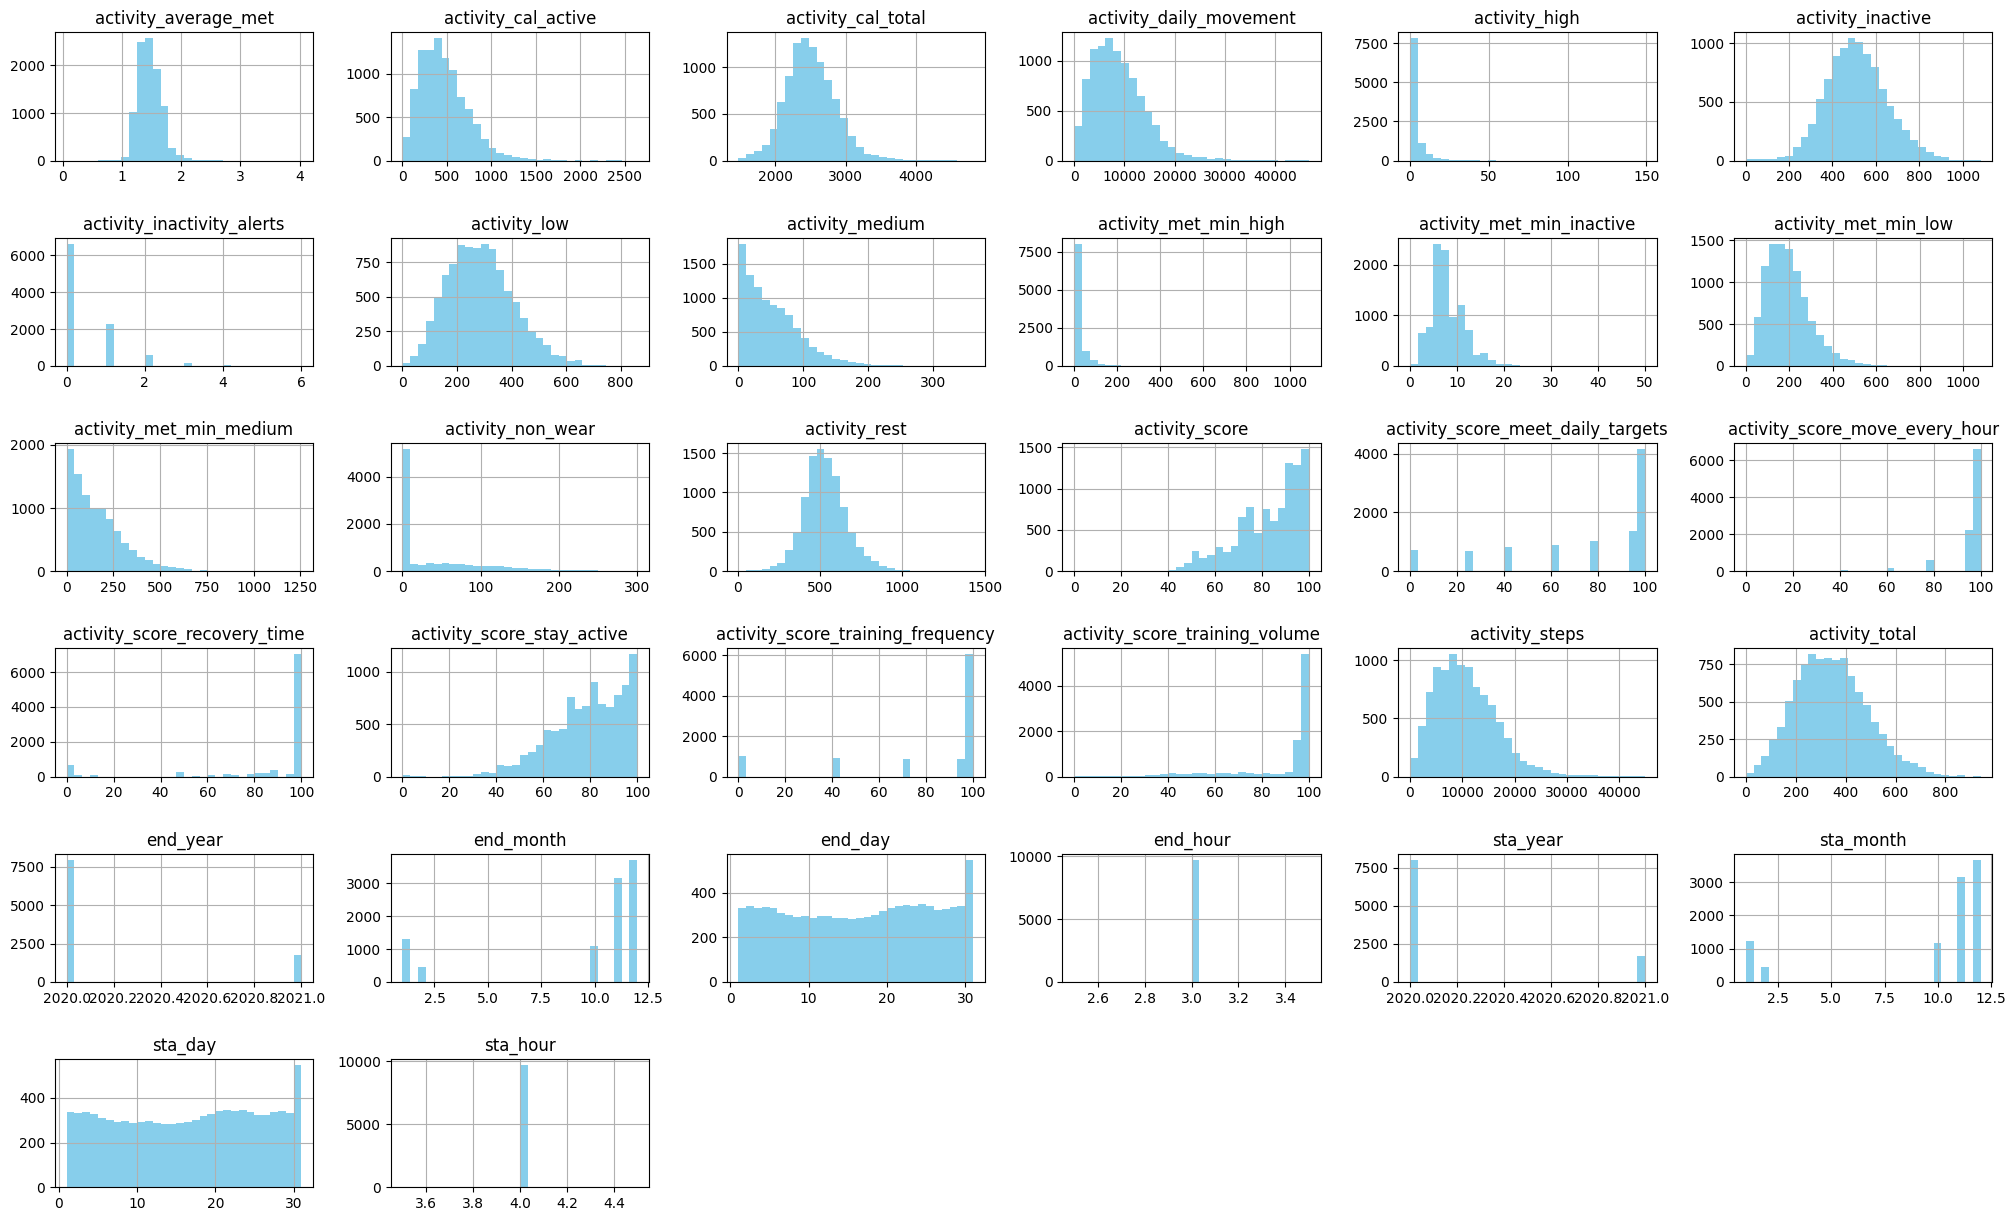

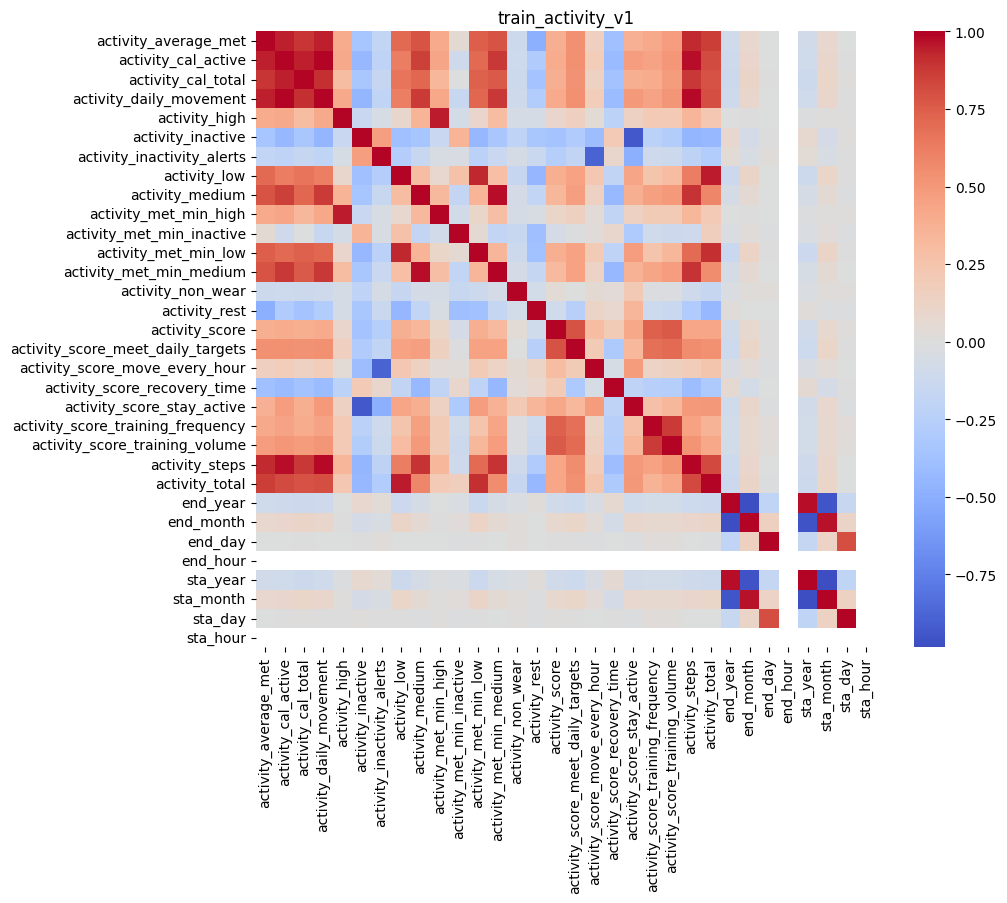

In [318]:
fst_eda(train_activity_v1, "train_activity_v1")

train_sleep_v1


,count,mean,std,min,25%,50%,75%,max
sleep_awake,9705.0,5496.389490,3453.783770,510.00,3030.00,4650.000,7050.000,26820.00
sleep_breath_average,9705.0,16.791589,1.294707,11.75,16.00,16.875,17.625,22.25
sleep_deep,9705.0,5104.166924,2621.211223,0.00,3150.00,4890.000,6720.000,15390.00
sleep_duration,9705.0,29113.706337,7097.636640,10800.00,24360.00,28800.000,33360.000,54000.00
sleep_efficiency,9705.0,81.747553,8.748557,40.00,77.00,83.000,88.000,98.00
sleep_hr_average,9705.0,60.404731,7.249047,35.90,55.28,60.130,65.160,99.99
sleep_hr_lowest,9705.0,54.929830,6.528942,33.00,50.00,55.000,59.000,91.00
sleep_is_longest,9705.0,1.000000,0.000000,1.00,1.00,1.000,1.000,1.00
sleep_light,9705.0,14836.071097,4472.616164,1500.00,11640.00,14580.000,17640.000,38190.00
sleep_midpoint_at_delta,9705.0,11470.083668,16449.217972,-9212.00,5130.00,8349.000,11897.000,98539.00


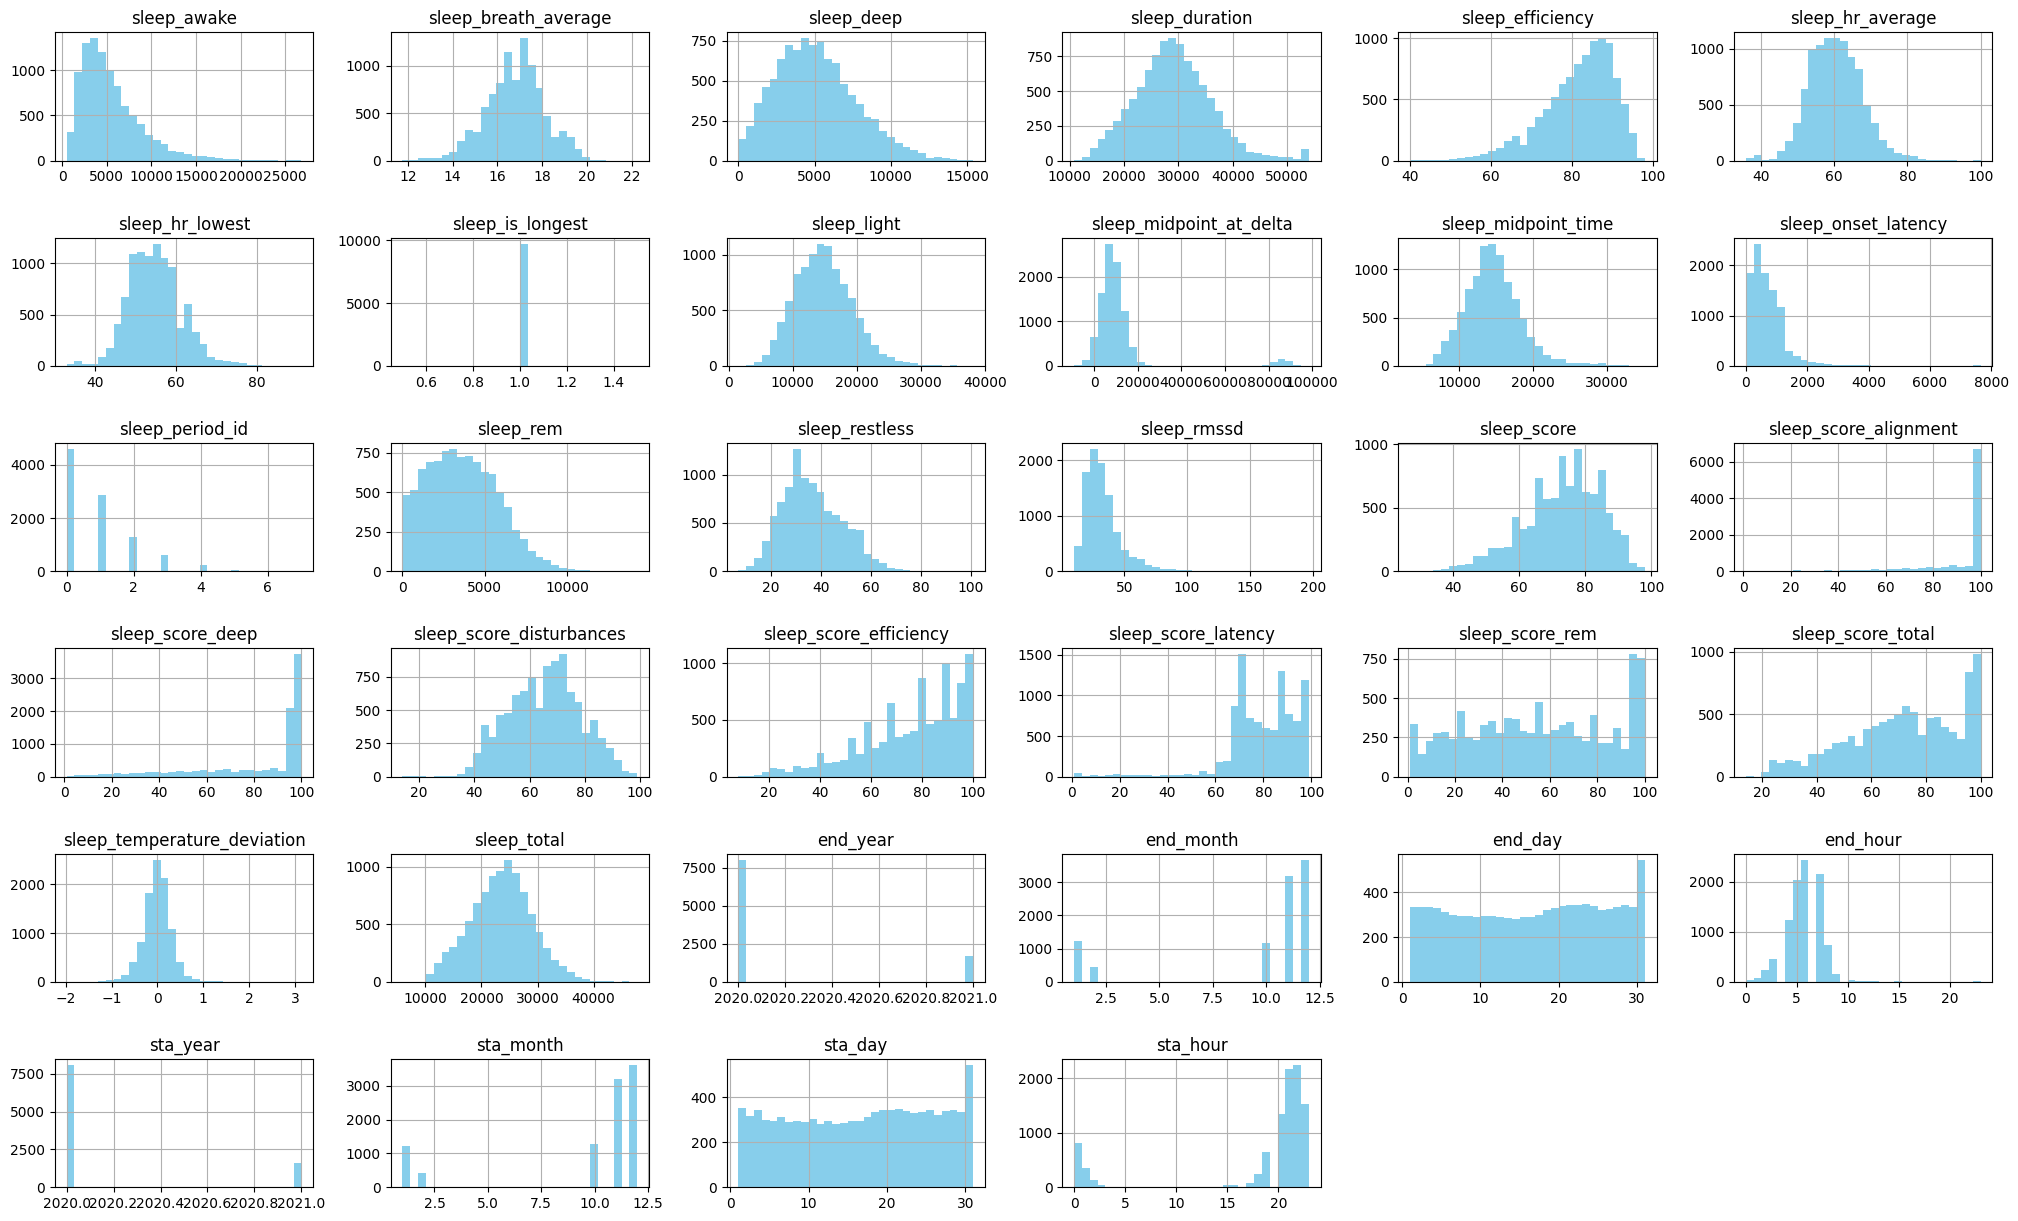

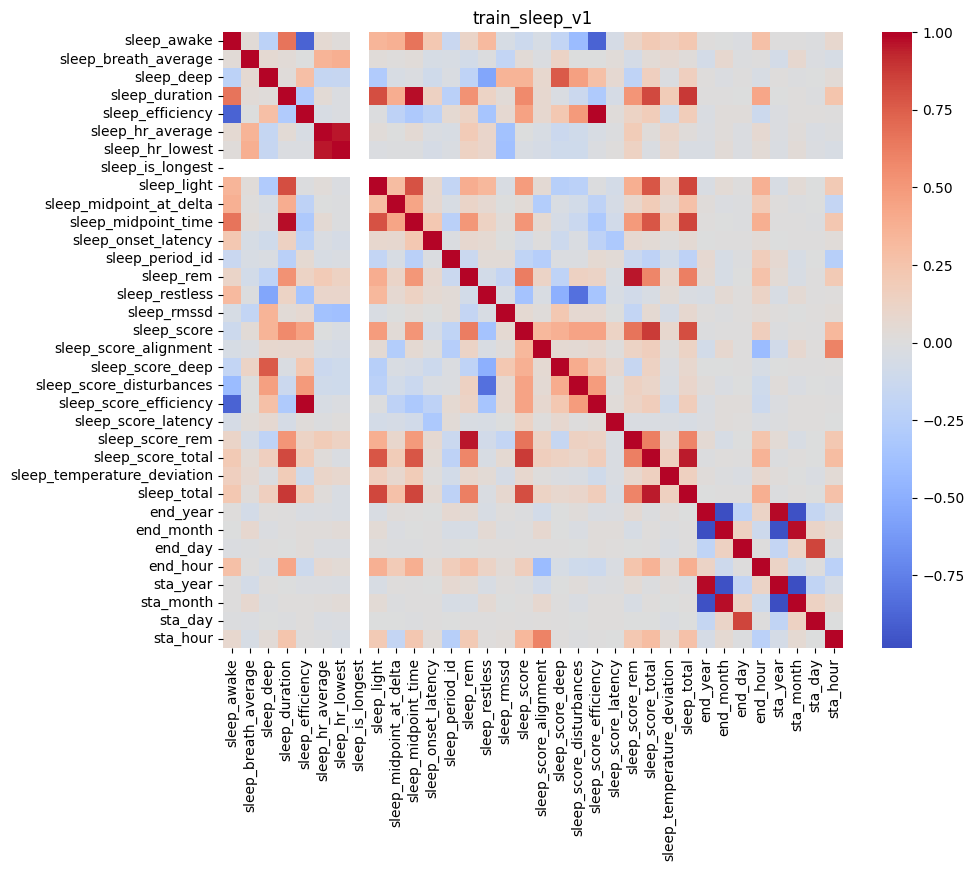

In [319]:
fst_eda(train_sleep_v1, "train_sleep_v1")

train_mmse


,count,mean,std,min,25%,50%,75%,max
DIAG_SEQ,141.0,2.517730,1.239832,1.0,1.0,2.0,3.0,5.0
MMSE_NUM,141.0,2.496454,1.228379,1.0,1.0,2.0,3.0,5.0
MMSE_KIND,141.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Q01,141.0,1.886525,0.318304,1.0,2.0,2.0,2.0,2.0
Q02,141.0,1.985816,0.118672,1.0,2.0,2.0,2.0,2.0
Q03,141.0,1.872340,0.334900,1.0,2.0,2.0,2.0,2.0
Q04,141.0,1.893617,0.309426,1.0,2.0,2.0,2.0,2.0
Q05,141.0,1.950355,0.217986,1.0,2.0,2.0,2.0,2.0
Q06,141.0,1.992908,0.084215,1.0,2.0,2.0,2.0,2.0
Q07,141.0,1.992908,0.084215,1.0,2.0,2.0,2.0,2.0


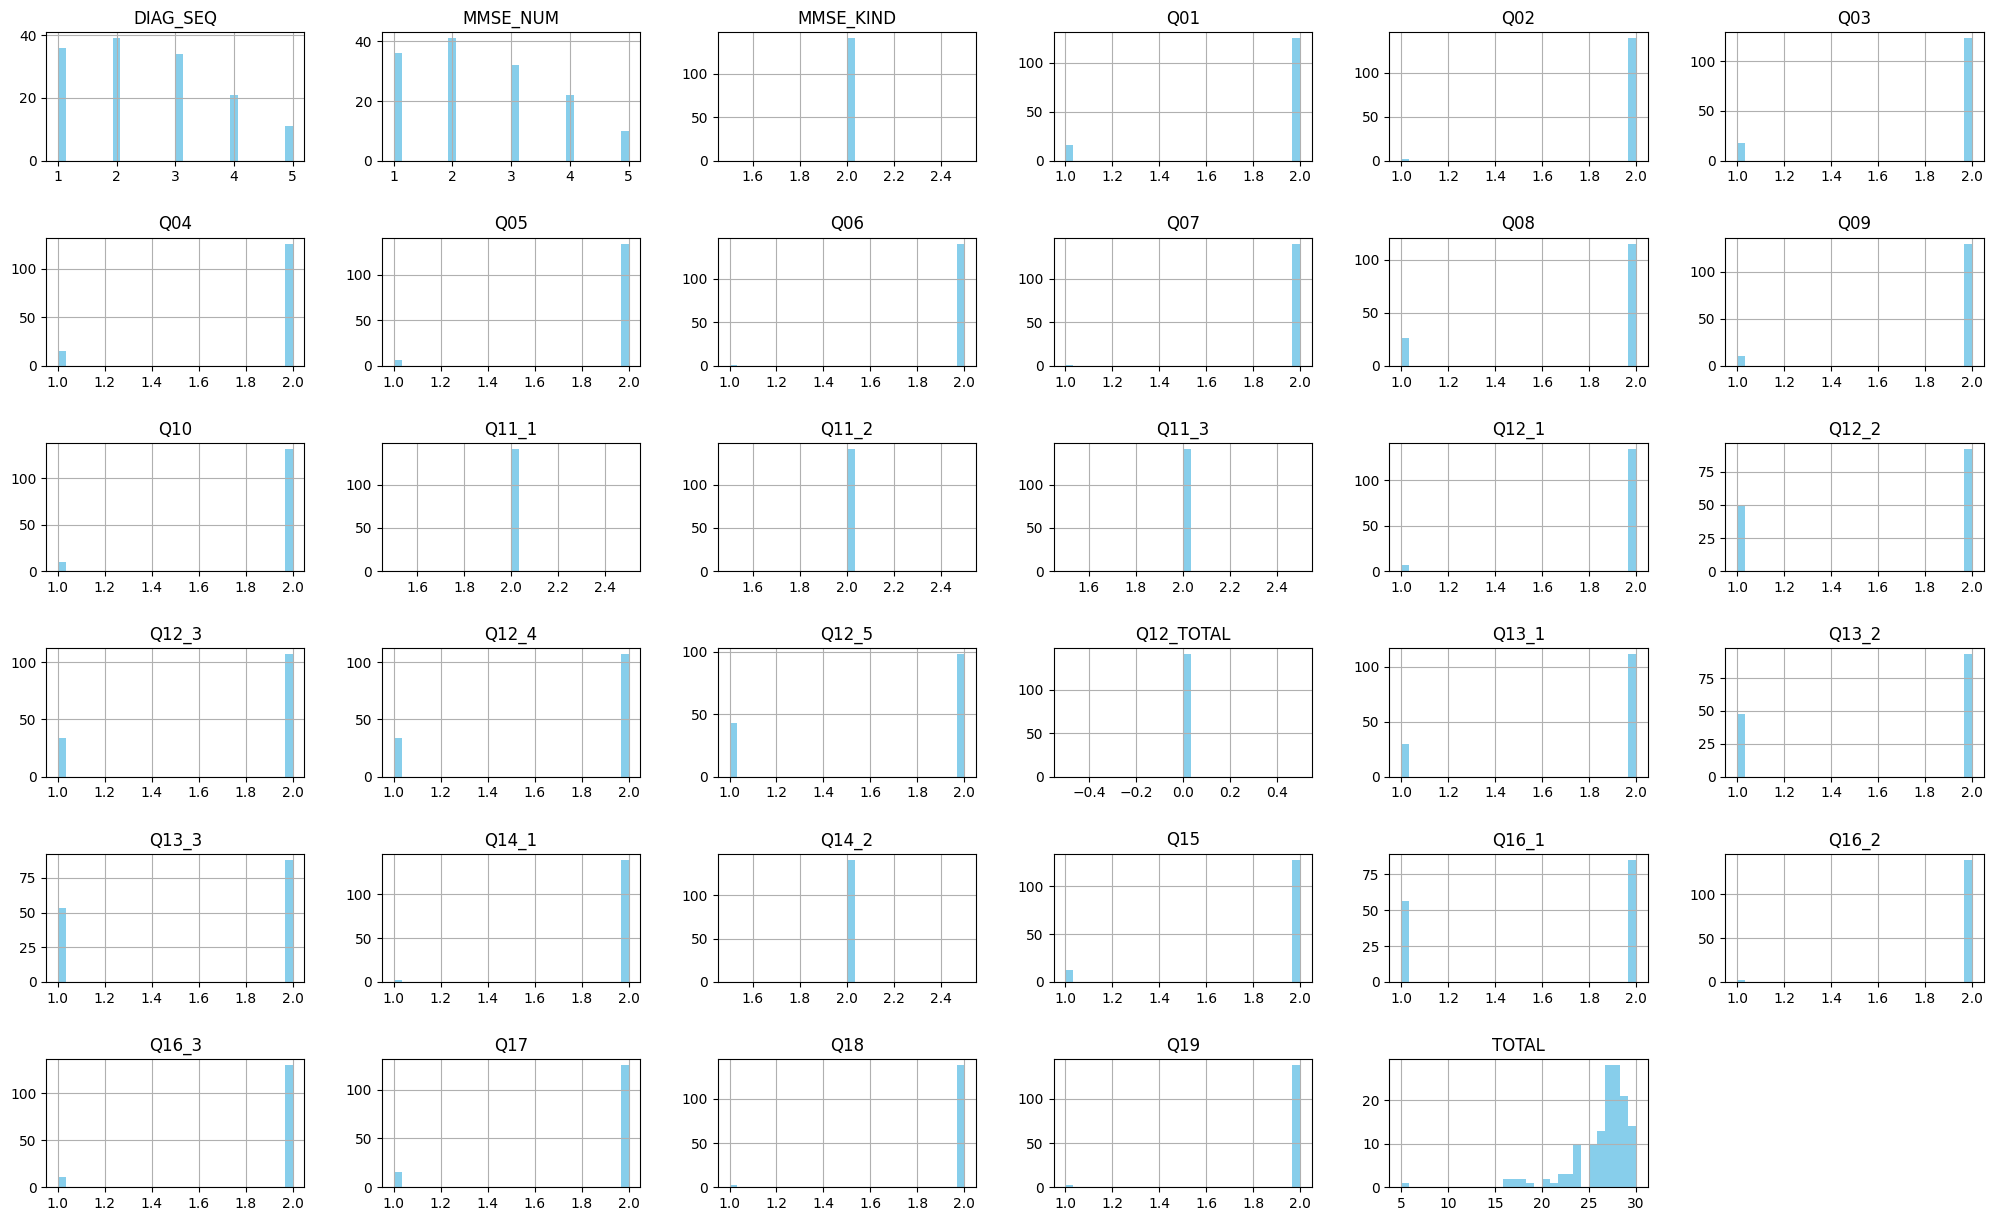

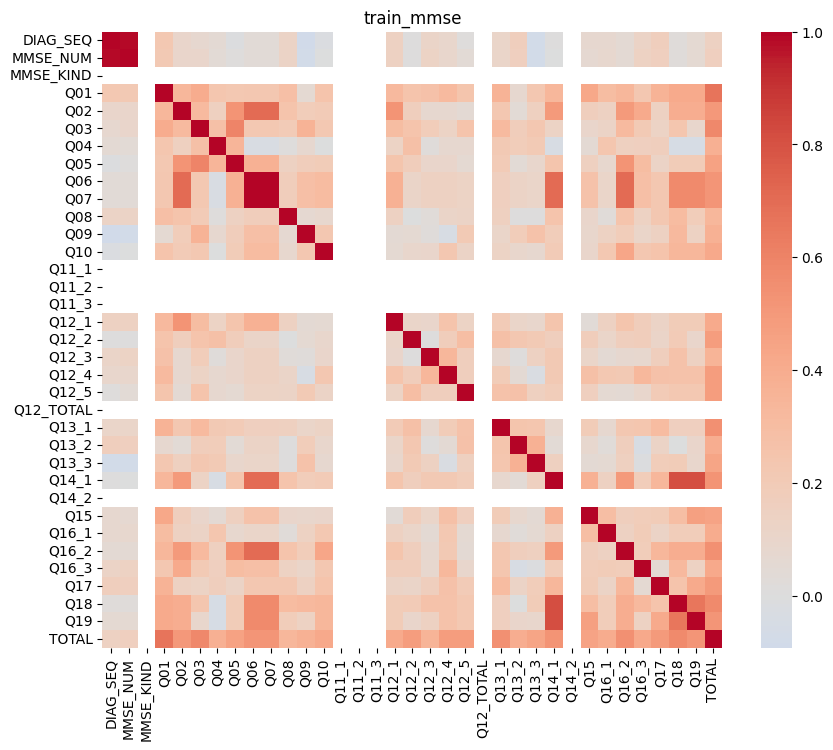

In [320]:
fst_eda(tr_mmse_df, "train_mmse")

In [355]:
tr_mmse_df

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,Q05,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,2,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,3,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,nia+181@rowan.kr,1,CN,1,2,2,2,2,1,2,...,2,2,2,2,2,1,2,2,2,26
137,nia+354@rowan.kr,2,CN,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,26
138,nia+448@rowan.kr,2,MCI,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28
139,nia+394@rowan.kr,3,CN,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28


In [321]:
act_df = train_activity_v1.copy()

In [322]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   EMAIL                              9705 non-null   object                   
 1   activity_average_met               9705 non-null   float64                  
 2   activity_cal_active                9705 non-null   int64                    
 3   activity_cal_total                 9705 non-null   int64                    
 4   activity_daily_movement            9705 non-null   int64                    
 5   activity_day_end                   9705 non-null   datetime64[ns, UTC+09:00]
 6   activity_day_start                 9705 non-null   datetime64[ns, UTC+09:00]
 7   activity_high                      9705 non-null   int64                    
 8   activity_inactive                  9705 non-null   int64            

In [323]:
vecter_list = ['heart_vecter','met_vecter']

vec_df = act_df[vecter_list]

In [335]:
act_df.columns

Index(['EMAIL', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_daily_movement', 'activity_day_end',
       'activity_day_start', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'activity_class_5min_list', 'activity_met_1min_list', 'end_year',
       'end_month', 'end_day', 'end_hour', 'sta_year', 'sta_month', 'sta_day',
       'sta_hour', 'heart_vecter', 'met_vecter'],
      dtype='object')

In [345]:
act_cols = act_df.columns

In [352]:
act_df[act_df['activity_high'] == 149]['EMAIL']

3003    nia+398@rowan.kr
Name: EMAIL, dtype: object

In [354]:
act_df[act_df['EMAIL'] == 'nia+398@rowan.kr'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 3003 to 3038
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype                    
---  ------                             --------------  -----                    
 0   EMAIL                              36 non-null     object                   
 1   activity_average_met               36 non-null     float64                  
 2   activity_cal_active                36 non-null     int64                    
 3   activity_cal_total                 36 non-null     int64                    
 4   activity_daily_movement            36 non-null     int64                    
 5   activity_day_end                   36 non-null     datetime64[ns, UTC+09:00]
 6   activity_day_start                 36 non-null     datetime64[ns, UTC+09:00]
 7   activity_high                      36 non-null     int64                    
 8   activity_inactive                  36 non-null     int64                

In [362]:
list(act_df.columns[27:])

['activity_class_5min_list',
 'activity_met_1min_list',
 'end_year',
 'end_month',
 'end_day',
 'end_hour',
 'sta_year',
 'sta_month',
 'sta_day',
 'sta_hour',
 'heart_vecter',
 'met_vecter']

In [365]:
type(act_df.columns)

pandas.core.indexes.base.Index

In [381]:
obj_col = ['EMAIL','activity_day_end','activity_day_start']
not_select_col = obj_col + list(act_df.columns[27:])
select_col = act_df.columns.drop(not_select_col)
select_col_act_df = act_df[select_col]
print(len(select_col_act_df.columns))
select_col_act_df.columns

24


Index(['activity_average_met', 'activity_cal_active', 'activity_cal_total',
       'activity_daily_movement', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total'],
      dtype='object')

In [373]:
sleep_df = train_sleep_v1.copy()

In [374]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype                    
---  ------                       --------------  -----                    
 0   EMAIL                        9705 non-null   object                   
 1   sleep_awake                  9705 non-null   int64                    
 2   sleep_bedtime_end            9705 non-null   datetime64[ns, UTC+09:00]
 3   sleep_bedtime_start          9705 non-null   datetime64[ns, UTC+09:00]
 4   sleep_breath_average         9705 non-null   float64                  
 5   sleep_deep                   9705 non-null   int64                    
 6   sleep_duration               9705 non-null   int64                    
 7   sleep_efficiency             9705 non-null   int64                    
 8   sleep_hr_average             9705 non-null   float64                  
 9   sleep_hr_lowest              9705 non-null   int64  

In [382]:
obj_col = ['EMAIL','sleep_bedtime_end','sleep_bedtime_start']
not_select_col = obj_col + list(sleep_df.columns[29:])
select_col = sleep_df.columns.drop(not_select_col)
select_col_slp_df = sleep_df[select_col]
print(len(select_col_slp_df.columns))
select_col_slp_df.columns

26


Index(['sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest',
       'sleep_is_longest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_deviation', 'sleep_total'],
      dtype='object')

앞뒤 3일 점수? 같은걸 알 수 있는 변수를 만들기
수면 -> 꾸준함이 건강의 지표 -> 변화량
운동 -> 주말 총량이 중요한 지표 -> 총량